This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the Snudda/snudda/examples/notebooks directory, as all paths are given relative to there.

First we create a network-config.json file in networks/simple_example which is a subdirectory to the notebooks directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the data/cellspecs/dspn and ispn folders.

In [1]:
import os
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(struct_def={}, config_file=config_file, num_population_units=1)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", cell_spec_dir="../../data/cellspecs")
cnc.write_json(config_file)


CreateConfig
Seeding with rand_seed=None
Random seed init to 1269751230
Random seed place to 3527803522
Random seed detect to 3386726571
Random seed prune to 1371875454
Random seed input to 90147263
Random seed simulate to 368805231
Overriding the number of population units
Using 1 Population Units
No structDef defined, not writing JSON file in init
Using cube for striatum
Creating cube mesh
File: networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00013543930142996346
Description: Striatum cube mesh, centre: [0.00354  0.004645 0.005081], side: 0.00013543930142996346
Adding neurons: dSPN from dir ../../data/cellspecs/dspn
Adding neurons: iSPN from dir ../../data/cellspecs/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda.place import SnuddaPlace
position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
sp = SnuddaPlace(config_file=config_file)
sp.read_config()
sp.write_data(position_file)

Using hdf5 version: latest
Parsing configuration file networks/simple_example/network-config.json
Reading random see from config file: 3527803522
Using mesh_bin_width 0.00013543930142996346
Cube mesh, switching to serial processing.
Found old cache file (networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle), ignoring.
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle
Calculation time: 0.019465157762169838 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 25 dSPN_0
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Placed 25 in 0.06314608547836542 s

In [3]:
from snudda.detect import SnuddaDetect
save_file = os.path.join(network_path, "voxels", "network-putative-synapses.hdf5")

sd = SnuddaDetect(config_file=config_file, position_file=position_file, save_file=save_file)
sd.detect()

Using hdf5 driver version: latest
Memory: 53981036544 free, 67218100224 total
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Removing old files networks/simple_example/network-putative-synapses-MERGED.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5
Loading from networks/simple_example/network-config.json
Reading random seed from config file: 3386726571
Reading prototype for: dSPN_0
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Reading prototype for: dSPN_3
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN

Create lookup table
detectSynapses: 0 took 0.004624565131962299 s
Create lookup table
detectGapJunctions: 0.0031218361109495163 s
Wrote hyper voxel 38 (0 synapses, 0 gap junctions)
HyperID 38 completed - 0  synapses and 0 gap junctions found (in 3.6434075022116303 s)
Processing hyper voxel : 0/64(26 neurons)
Create lookup table
detectSynapses: 0 took 0.004589656367897987 s
Create lookup table
detectGapJunctions: 0.003148052841424942 s
Wrote hyper voxel 0 (0 synapses, 0 gap junctions)
HyperID 0 completed - 0  synapses and 0 gap junctions found (in 5.084078004583716 s)
Processing hyper voxel : 24/64(25 neurons)
Create lookup table
detectSynapses: 0 took 0.0045648906379938126 s
Create lookup table
detectGapJunctions: 0.003015102818608284 s
Wrote hyper voxel 24 (0 synapses, 0 gap junctions)
HyperID 24 completed - 0  synapses and 0 gap junctions found (in 3.98718941770494 s)
Processing hyper voxel : 41/64(20 neurons)
Create lookup table
detectSynapses: 3 took 0.004758794791996479 s
Create l

Prune the synapses in the network based on the connection information in the network-config.json file.

In [4]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/simple_example/log/network-detect-worklog.hdf5
Reading random seed from config file: 1371875454
Using default scratch path: networks/simple_example/temp
Skipping FSN to FSN connection
Skipping FSN to dSPN connection
Skipping FSN to iSPN connection
Skipping FSN to LTS connection
Skipping dSPN to ChIN connection
Skipping iSPN to ChIN connection
Skipping LTS to dSPN connection
Skipping LTS to iSPN connection
Skipping LTS to ChIN connection
Checking for merge file networks/simple_example/network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing big_merge_loopup for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Setting max_channel_type to 23 from h_id=21
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-5.hdf5
[0, 521, 20971520, 0.75]
Opening 

Random seed set for neuron 72: 2044437336
Random seed set for neuron 73: 2416220524
Random seed set for neuron 74: 347103678
Random seed set for neuron 75: 4247811939
Random seed set for neuron 76: 2127062923
Random seed set for neuron 77: 4224608214
Random seed set for neuron 78: 348048768
Random seed set for neuron 79: 2423753668
Random seed set for neuron 80: 4293335460
Random seed set for neuron 81: 1755555691
Random seed set for neuron 82: 2972565571
Random seed set for neuron 83: 2861283224
Random seed set for neuron 84: 3725261833
Random seed set for neuron 85: 1732735807
Random seed set for neuron 86: 802944069
Random seed set for neuron 87: 3211000080
Random seed set for neuron 88: 212038560
Random seed set for neuron 89: 3361858121
Random seed set for neuron 90: 3122307796
Random seed set for neuron 91: 3777758463
Random seed set for neuron 92: 919152394
Random seed set for neuron 93: 1187489311
Random seed set for neuron 94: 152535273
Random seed set for neuron 95: 271486435

Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 24437 synapses and 0 gap junctions
Load done. 0.02061227522790432
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e160118_c10_D2-m46-3-DE-v20190529/46-3-DE-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e150917_c11_D2-mWT-MSN1-v20190603/WT-MSN1-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-

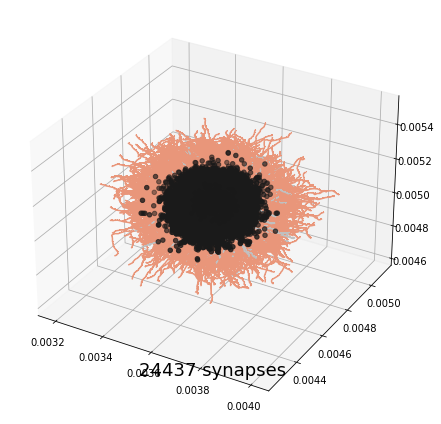

In [5]:
from snudda.plotting.plot_network import PlotNetwork
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it